<h1 style="text-align:center;">Assignment 3.2</h1><br>
<div class="alert alert-block alert-info" style="text-align:left;">
    <h3 style="text-align:left;"> Part 2: Expand the basic code for building a DNN on the Black Friday Dataset to include:</h3>
        <ol style="list-style: lower-latin;">
            <li>Pre-process the data by scaling/standardizing the 8 columns.</li>
            <br>
            <li>Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data.</li>
            <br>
            <li>Make Epoch versus train set RMSE, and validation set RMSE</li> 
            <br>
            <li>It’s a regression problem and we need only one neuron in the final layer! Implementing all the above steps.
            <br>
            <br>
            <li>Source: 
                <a href="https://www.kaggle.com/sdolezel/black-friday"> https://www.kaggle.com/sdolezel/black-friday</a>
            </li>
    </ol>
</div>

## Table of Contents:

1. [Imports and Configuration](#1.-Imports-and-Configuration)
2. [Reading Data into Notebook](#2.-Reading-Data-into-Notebook)
3. [Visualise the Dataset](#3.-Visualise-the-Dataset)
4. [Data Correlation Matrix](#4.-Data-Correlation-Matrix)
5. [Data Cleaning and Transformation](#5.-Data-Cleaning-and-Transformation)
6. [Train - Valid - Test Split](#6.-Train---Valid---Test-Split) 
7. [Scaling - Standardization](#7.-Scaling---Standardization)
8. [Building a DNN Model](#8.-Building-a-DNN-Model)
9. [Epoch Vs Training Accuracy, Validation Accuracy](#9.-Epoch-Vs-Training-Accuracy,-Validation-Accuracy)
10. [Conclusion](#10.-Conclusion)

---

<h4>Description: Predicting Prices for the products to be sold on Black Friday in US using Regression Analysis, Feature Engineering, Feature Selection, Feature Extraction and Data analysis - Data Visualizations. </h4>
<ul>
    <li>The dataset has 550,069 rows and 12 columns.</li>
    <li>The dataset here is a sample of the transactions made in a retail store.</li>
    <li>The store wants to know better the customer purchase behaviour against different products.</li>
    <li>Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.


![alt text](DataSet/Black_Friday_Column_details.png "Analytics Vidya Dataset")

---

In [1]:
'''Below code is used to cente the output plots to center. 
Refrerence: https://stackoverflow.com/questions/18380168/center-output-plots-in-the-notebook'''

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

[Scroll Top](#Assignment-3.2)

---

## 1. Imports and Configuration

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.activations import relu, sigmoid
from keras import callbacks 

%matplotlib inline

In [3]:
%pwd

'C:\\Users\\srush\\Documents\\Srushti NEU\\Full Summer 2020\\INFO 6105 Data Science Engineering Methods and Tools\\Assignment\\Assignment 3'

In [4]:
!ls

Assignment 3.1 - DNN Classification.ipynb
Assignment 3.2 - DNN Regression .ipynb
DataSet


In [5]:
#Define a variable that points to this. This will let you avoid typing the long path everytime you need to use it
my_path = 'C:\\Users\\srush\\Documents\\Srushti NEU\\Full Summer 2020\\INFO 6105 Data Science Engineering Methods and Tools\\Assignment\\Assignment 3'

[Scroll Top](#Assignment-3.2)

---

## 2. Reading Data into Notebook

In [6]:
# We read the data from the CSV file
# We placed the dataset under datasets/ sub folder
df_train = pd.read_csv(f'{my_path}/DataSet/Black Friday_train.csv')
df_test = pd.read_csv(f'{my_path}/DataSet/Black Friday_test.csv')

# Check the shape of the data: we have 768 rows and 9 columns: the first 8 columns are features while the last one
# is the supervised label (1 = has diabetes, 0 = no diabetes)
print(df_train.shape)

# Visualise a table with the first rows of the dataset, to better understand the data format
df_train.head(10)

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [7]:
print(df_test.shape)

(233599, 11)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [10]:
df_train.isnull().values.any()

True

In [11]:
# Checking for Null values
round((df_train.isnull().sum() / df_train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [12]:
# Checking for Null values
round((df_test.isnull().sum() / df_test.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            30.97 %
Product_Category_3            69.59 %
dtype: object

[Scroll Top](#Assignment-3.2)

---

## 3. Visualise the Dataset

### 1. Gender and Age

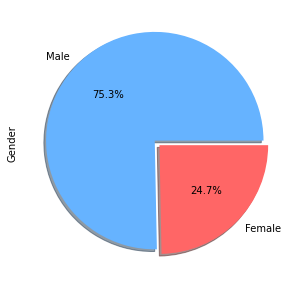

In [13]:
plt.figure(figsize=(10, 5))
df_train["Gender"].value_counts().plot.pie(explode=(0.03, 0.03), 
            labels=["Male", "Female"], 
            autopct="%1.1f%%", shadow=True, 
            colors=[(102/255, 179/255, 1, 1), (255/255, 102/255, 102/255, 1)])

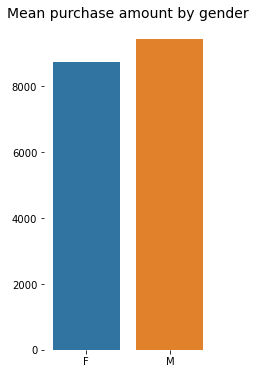

In [14]:
plt.figure(figsize=(3, 6))
gender = df_train[['Gender', 'Purchase']].groupby('Gender', as_index=False).agg('mean')
sns.barplot(x='Gender', y='Purchase', data=gender)
plt.ylabel('')
plt.xlabel('')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Mean purchase amount by gender', size=14)
plt.show()

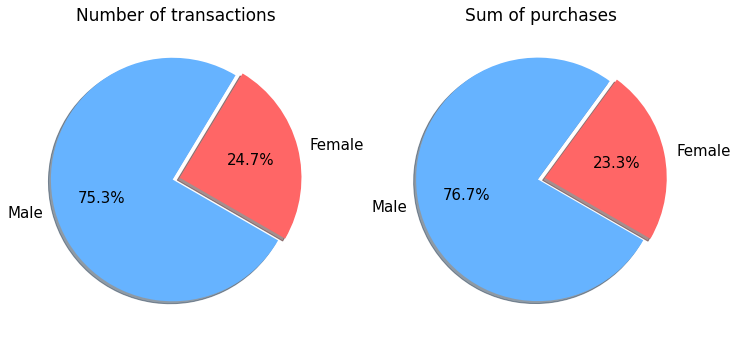

In [15]:
plt.figure(figsize=(12, 6))
gender = df_train[['Gender', 'Purchase']].groupby('Gender').agg(['count', 'sum'])
params = {
    'colors': [ (255/255, 102/255, 102/255, 1), (102/255, 179/255, 1, 1)],
    'labels': gender.index.map({'M': 'Male', 'F': 'Female'}),
    'autopct': '%1.1f%%',
    'startangle': -30, 
    'textprops': {'fontsize': 15},
    'explode': (0.03, 0.03),
    'shadow': True
}
plt.subplot(121)
plt.pie(gender['Purchase']['count'], **params)
plt.title('Number of transactions', size=17)
plt.subplot(122)
plt.pie(gender['Purchase']['sum'], **params)
plt.title('Sum of purchases', size=17)
plt.show()

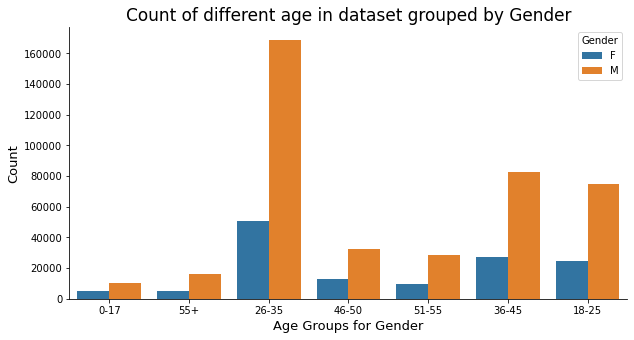

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(df_train["Age"], hue=df_train["Gender"])
plt.title('Count of different age in dataset grouped by Gender', size=17)
plt.xlabel('Age Groups for Gender', size=13)
plt.ylabel('Count', size=13)
sns.despine()

Text(0, 0.5, 'Age Group')

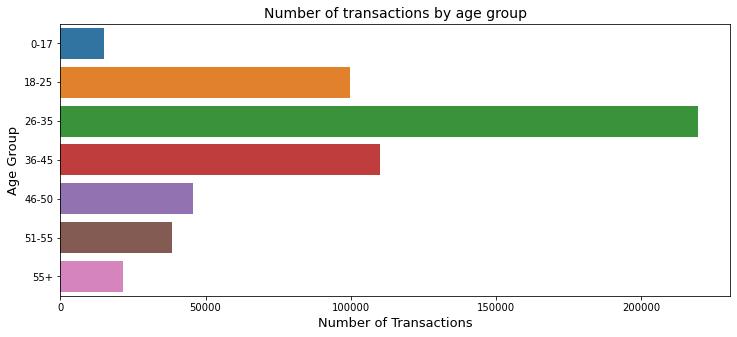

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(y='Age', data=df_train, order=sorted(df_train.Age.unique()))
plt.title('Number of transactions by age group', size=14)
plt.xlabel('Number of Transactions', size=13)
plt.ylabel('Age Group', size=13)

In [18]:
# plt.figure(figsize=(12, 5))
# df_train.groupby(["Age"]).sum()[["Purchase"]].plot.bar(title="Age & Purchase")
# plt.xticks(rotation=45)
# sns.despine()

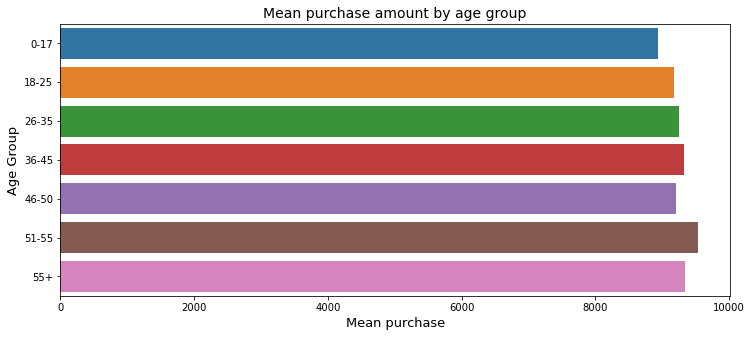

In [19]:
plt.figure(figsize=(12, 5))
age_gb = df_train[['Age', 'Purchase']].groupby('Age', as_index=False).agg('mean')
sns.barplot(y='Age', x='Purchase', data=age_gb, order=sorted(df_train.Age.unique()))
plt.title('Mean purchase amount by age group', size=14)
plt.xlabel('Mean purchase' , size=13)
plt.ylabel('Age Group' , size=13)
plt.show()

In [20]:
malesPurchaserData = df_train.loc[df_train['Gender'] == 'M']
print('Number of males purchaser = ',malesPurchaserData.shape[0])

femalsPurchaserData = df_train.loc[df_train['Gender'] == 'F']
print('Number of females purchaser = ',femalsPurchaserData.shape[0])

Number of males purchaser =  414259
Number of females purchaser =  135809


In [21]:

malesPurchaseMean = np.mean(malesPurchaserData['Purchase'])
print("Purchase (mean) for male purchasers = ",malesPurchaseMean)


femalsPurchaseMean = np.mean(femalsPurchaserData['Purchase'])
print("Purchase (mean) for female purchasers = ",femalsPurchaseMean)

Purchase (mean) for male purchasers =  9437.526040472265
Purchase (mean) for female purchasers =  8734.565765155476


[Scroll Top](#Assignment-3.2)

---

### 2. Occupation

In [22]:
list(df_train['Occupation'].sort_values().unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [23]:
labels = []
values = []

for uniqueOccupationValue in df_train['Occupation'].sort_values().unique():
    OccPurchaserData = df_train.loc[df_train['Occupation'] == uniqueOccupationValue]
    OccPurchaserMean = np.mean(OccPurchaserData['Purchase'])
    labels.append(uniqueOccupationValue)
    values.append(OccPurchaserMean)
    
    print("Occupation = ",uniqueOccupationValue," purchase value (mean) = ",OccPurchaserMean)
    print("------------------------------------------------------------")

Occupation =  0  purchase value (mean) =  9124.428587839973
------------------------------------------------------------
Occupation =  1  purchase value (mean) =  8953.193269514612
------------------------------------------------------------
Occupation =  2  purchase value (mean) =  8952.481683466225
------------------------------------------------------------
Occupation =  3  purchase value (mean) =  9178.593087818697
------------------------------------------------------------
Occupation =  4  purchase value (mean) =  9213.980251147868
------------------------------------------------------------
Occupation =  5  purchase value (mean) =  9333.149297856615
------------------------------------------------------------
Occupation =  6  purchase value (mean) =  9256.535691476296
------------------------------------------------------------
Occupation =  7  purchase value (mean) =  9425.728222819745
------------------------------------------------------------
Occupation =  8  purchase value 

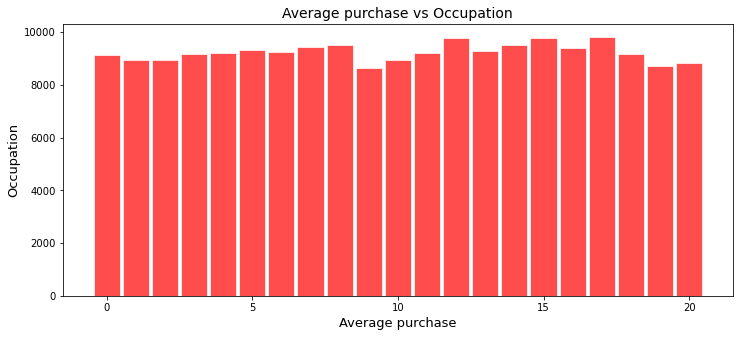

In [24]:
plt.figure(figsize=(12, 5))
plt.bar(labels, values, width=.9, facecolor='r', edgecolor='w',alpha=.7)
plt.title("Average purchase vs Occupation", size=14)
plt.xlabel('Average purchase', size=13)
plt.ylabel('Occupation', size=13)         
plt.show()

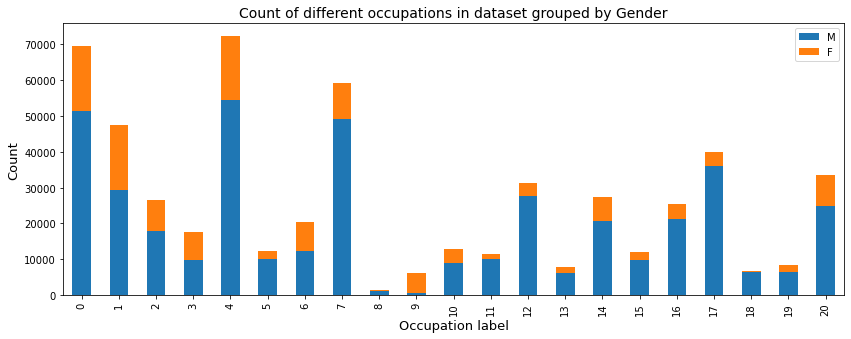

In [25]:
men = df_train[df_train.Gender == 'M']['Occupation'].value_counts(sort=False)
women = df_train[df_train.Gender == 'F']['Occupation'].value_counts(sort=False)
pd.DataFrame({'M': men, 'F': women}, index=range(0,21)).plot.bar(stacked=True)
plt.gcf().set_size_inches(14, 5)
plt.title("Count of different occupations in dataset grouped by Gender", size=14)
plt.legend(loc="upper right")
plt.xlabel('Occupation label', size=13)
plt.ylabel('Count', size=13)
plt.show()

[Scroll Top](#Assignment-3.2)

---

### 3. City_Category 

In [26]:
list(df_train['City_Category'].sort_values().unique())

['A', 'B', 'C']

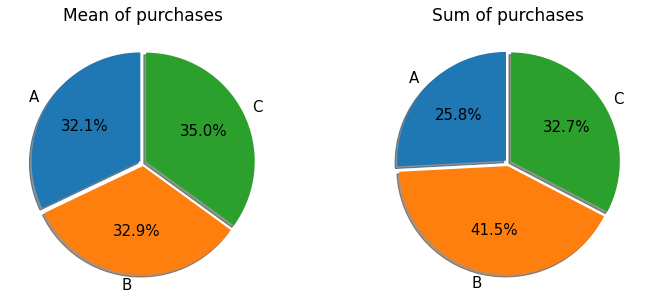

In [27]:
plt.figure(figsize=(12, 5))
city_cat = df_train[['City_Category', 'Purchase']].groupby('City_Category').agg(['count', 'mean', 'sum'])
params = {
    'labels': city_cat.index.map({'A': 'A', 'B': 'B', 'C': 'C'}),
    'autopct': '%1.1f%%',
    'startangle': 90, 
    'textprops': {'fontsize': 15},
    'explode': (0.03, 0.03, 0.03),
    'shadow': True
}
plt.subplot(121)
plt.pie(city_cat['Purchase']['mean'], **params)
plt.title('Mean of purchases', size=17)
plt.subplot(122)
plt.pie(city_cat['Purchase']['sum'], **params)
plt.title('Sum of purchases', size=17)
plt.show()

In [92]:
for uniqueCityCategoryValue in df_train['City_Category'].sort_values().unique():
    CityCatPurchaserData = df_train.loc[df_train['City_Category'] == uniqueCityCategoryValue]
    print("Purchasers count who live in city of category ",uniqueCityCategoryValue," = ",CityCatPurchaserData.shape[0])
    print("------------------------------------------------------------")
    

Purchasers count who live in city of category  A  =  147720
------------------------------------------------------------
Purchasers count who live in city of category  B  =  231173
------------------------------------------------------------
Purchasers count who live in city of category  C  =  171175
------------------------------------------------------------


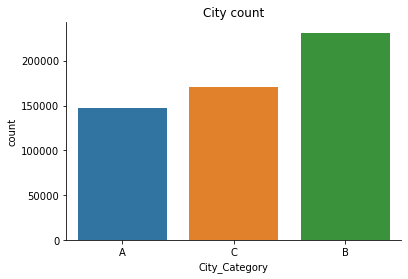

In [30]:
sns.countplot(df_train["City_Category"]).set_title("City count")
sns.despine()

[Scroll Top](#Assignment-3.2)

---

### 4. Stay_In_Current_City_Years 

In [31]:
list(df_train['Stay_In_Current_City_Years'].sort_values().unique())

['0', '1', '2', '3', '4+']

In [32]:
for uniqueYearsValue in df_train['Stay_In_Current_City_Years'].sort_values().unique():
    CityYearsPurchaserData = df_train.loc[df_train['Stay_In_Current_City_Years'] == uniqueYearsValue]
    if uniqueYearsValue != 4:
        print("Number of purchasers who stay ",uniqueYearsValue," years = ",CityYearsPurchaserData.shape[0])
    elif uniqueYearsValue == 4:
        print("Number of purchasers who stay more than ",uniqueYearsValue," years = ",CityYearsPurchaserData.shape[0])

Number of purchasers who stay  0  years =  74398
Number of purchasers who stay  1  years =  193821
Number of purchasers who stay  2  years =  101838
Number of purchasers who stay  3  years =  95285
Number of purchasers who stay  4+  years =  84726


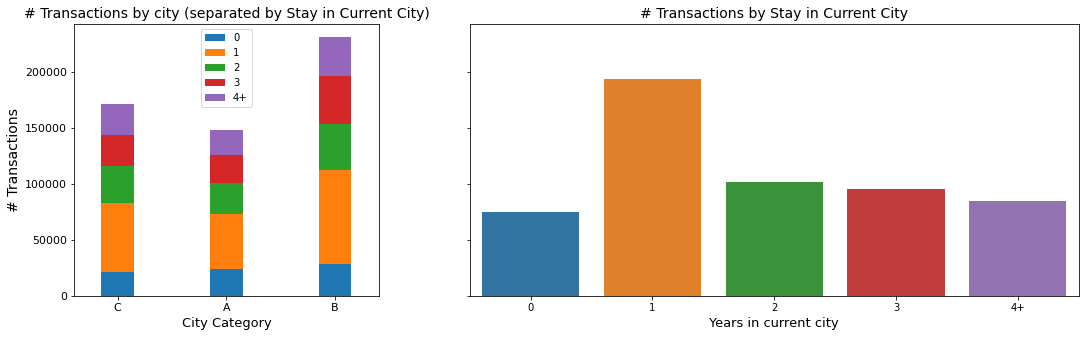

In [33]:
stay_years = [df_train[df_train.Stay_In_Current_City_Years == x]
              ['City_Category'].value_counts(sort=False).iloc[::-1] 
              for x in sorted(df_train.Stay_In_Current_City_Years.unique())]

f, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 2]}, sharey=True)

years = sorted(df_train.Stay_In_Current_City_Years.unique())
pd.DataFrame(stay_years, index=years).T.plot.bar(stacked=True, width=0.3, ax=ax1, rot=0, fontsize=11)
ax1.set_xlabel('City Category', size=13)
ax1.set_ylabel('# Transactions', size=14)
ax1.set_title('# Transactions by city (separated by Stay in Current City)', size=14)

sns.countplot(x='Stay_In_Current_City_Years', data=df_train, ax=ax2, order=years)
ax2.set_title('# Transactions by Stay in Current City', size=14)
ax2.set_ylabel('')
ax2.set_xlabel('Years in current city', size=13)

plt.gcf().set_size_inches(18, 5)
plt.show()

In [34]:
labels = []
values = []
yearsCountData = []

for uniqueYearsValue in df_train['Stay_In_Current_City_Years'].sort_values().unique():
    CityYearsPurchaserData = df_train.loc[df_train['Stay_In_Current_City_Years'] == uniqueYearsValue]
    CityYearsPurchaserMean = np.mean(CityYearsPurchaserData['Purchase'])
    labels.append(uniqueYearsValue)
    values.append(CityYearsPurchaserMean)
    yearsCountData.append(CityYearsPurchaserData.shape[0])
    
    if uniqueYearsValue != 4:
        print("Mean purchase of people who stay ",uniqueYearsValue," years = ",CityYearsPurchaserMean)
    elif uniqueYearsValue == 4:
        print("Mean purchase of people who stay more than ",uniqueYearsValue," years = ",CityYearsPurchaserMean)

Mean purchase of people who stay  0  years =  9180.075122987177
Mean purchase of people who stay  1  years =  9250.145923300364
Mean purchase of people who stay  2  years =  9320.429810090536
Mean purchase of people who stay  3  years =  9286.904119221284
Mean purchase of people who stay  4+  years =  9275.59887165687


[Scroll Top](#Assignment-3.2)

---

### 5. Product

In [36]:
list(df_train['Product_Category_1'].sort_values().unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [37]:
Product_Category_1_sum = df_train['Product_Category_1'].sum()
Product_Category_2_sum = df_train['Product_Category_2'].sum()
Product_Category_3_sum = df_train['Product_Category_3'].sum()

print("Profit from Product_Category_1 = ",Product_Category_1_sum)
print("Profit from Product_Category_2 = ",Product_Category_2_sum)
print("Profit from Product_Category_3 = ",Product_Category_3_sum)

Profit from Product_Category_1 =  2972716
Profit from Product_Category_2 =  3704948.0
Profit from Product_Category_3 =  2113329.0


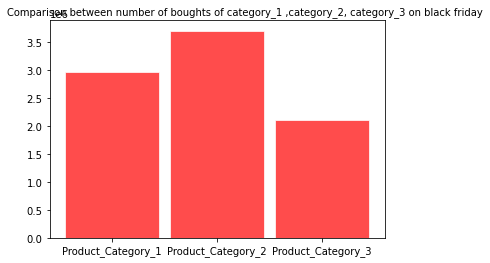

In [38]:
labels = ['Product_Category_1','Product_Category_2','Product_Category_3']
values = [Product_Category_1_sum,Product_Category_2_sum, Product_Category_3_sum]

plt.bar(labels,values, width=.9, facecolor='r', edgecolor='w', alpha=.7)
plt.text(-1,4000000,'Comparison between number of boughts of category_1 ,category_2, category_3 on black friday')
         
plt.show()

Profit from product of category 2 has more than product of category 1.

[Scroll Top](#Assignment-3.2)

---

### 6. Marital_Status 

In [39]:
list(df_train['Marital_Status'].sort_values().unique())

[0, 1]

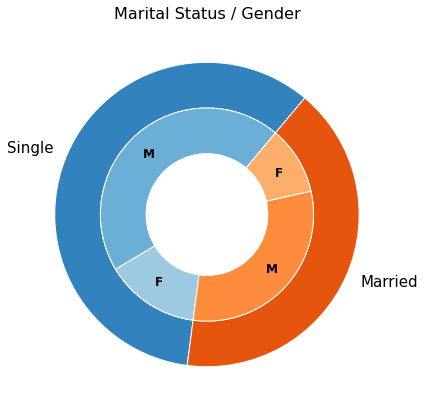

In [40]:
out_vals = df_train.Marital_Status.value_counts()
in_vals = np.array([df_train[df_train.Marital_Status==x]['Gender'].value_counts() for x in [0,1]]).flatten()

fig, ax = plt.subplots(figsize=(7, 7))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6]))

ax.pie(out_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Single', 'Married'],
       textprops={'fontsize': 15}, startangle=50)

ax.pie(in_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['M', 'F', 'M', 'F'],
       labeldistance=0.75, textprops={'fontsize': 12, 'weight': 'bold'}, startangle=50)

ax.set(aspect="equal")
plt.title('Marital Status / Gender', fontsize=16)
plt.show()

In [41]:
for maritalStatusValue in df_train['Marital_Status'].unique():
    maritalStatusPurchaserData = df_train.loc[df_train['Marital_Status'] == maritalStatusValue]
    print("Number of purchasers who marital status is ",maritalStatusValue," = ",maritalStatusPurchaserData.shape[0])

Number of purchasers who marital status is  0  =  324731
Number of purchasers who marital status is  1  =  225337


In [42]:
labels = []
values = []
maritalStatusCount = []

for maritalStatusValue in df_train['Marital_Status'].unique():
    maritalStatusPurchaserData = df_train.loc[df_train['Marital_Status'] == maritalStatusValue]
    maritalStatusPurchaserMean = np.mean(maritalStatusPurchaserData['Purchase'])
    labels.append(maritalStatusValue)
    values.append(maritalStatusPurchaserMean)
    maritalStatusCount.append(maritalStatusPurchaserData.shape[0])
    
    print("Mean purchase of people who marital Status is ",maritalStatusValue," = ",maritalStatusPurchaserMean)

Mean purchase of people who marital Status is  0  =  9265.907618921507
Mean purchase of people who marital Status is  1  =  9261.174574082374


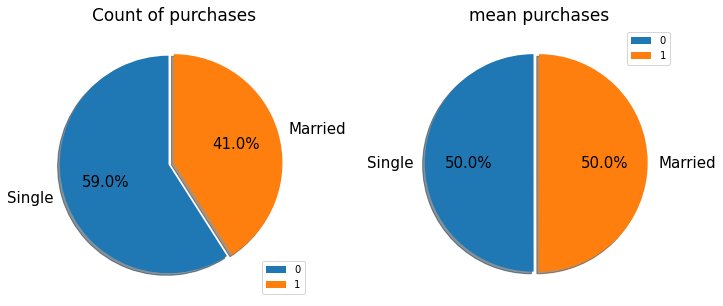

In [43]:
plt.figure(figsize=(12, 5))
marital_status = df_train[['Marital_Status', 'Purchase']].groupby('Marital_Status').agg(['count', 'mean'])
params = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'labels': {'Single','Married'},
    'textprops': {'fontsize': 15},
    'explode': (0.05, 0,),
    'shadow': True
}
plt.subplot(121)
plt.pie(marital_status['Purchase']['count'], **params)
plt.title('Count of purchases', size=17)
plt.legend(labels)
plt.subplot(122)
plt.pie(marital_status['Purchase']['mean'], **params)
plt.title('mean purchases', size=17)
plt.legend(labels)
plt.show()

[Scroll Top](#Assignment-3.2)

---

## 4. Data Correlation Matrix


The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics. Let's calculate the correlation matrix for our dataset.

###  Feature Encoding

In [44]:
df_train_4 = df_train.copy()

In [45]:
# label encoding: categorical to numeric (Feature Encoding)
#Train Dataset
le = preprocessing.LabelEncoder()

cat_col = df_train_4.select_dtypes(include="object").columns.tolist()
for i in cat_col:
    df_train_4.loc[:, i] = le.fit_transform(df_train_4.loc[:, i])

In [46]:
# label encoding: categorical to numeric (Feature Encoding)
#Test dataset
le = preprocessing.LabelEncoder()

cat_col = df_test.select_dtypes(include="object").columns.tolist()
for i in cat_col:
    df_test.loc[:, i] = le.fit_transform(df_test.loc[:, i])

Text(0.5, 1.0, 'Correlation between features')

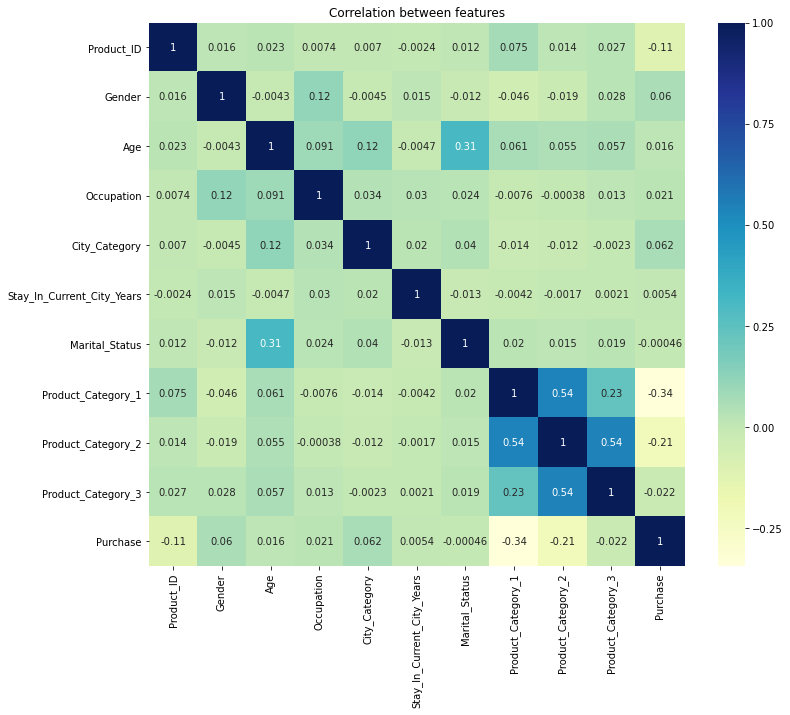

In [47]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_train_4.drop("User_ID", axis=1).corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")

From the heatmap above we can observe there are strong correlations between different types' products and purchase. There is also some correlation between age and marital status which is in line with common sense. Unfortunately, there is no single feature that shows strong correlation with purchase directly, so we can understand this as that purchase depends on the ensemble of all features.

[Scroll Top](#Assignment-3.2)

---

## 5. Data Cleaning and Transformation

In [48]:
df_train_5 = df_train_4.copy()

In [49]:
df_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int32
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int32(5), int64(5)
memory usage: 39.9 MB


In [50]:
# Checking for Null values
round((df_train_5.isnull().sum() / df_train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [51]:
df_train_5['Product_Category_1'].fillna(df_train['Product_Category_1'].median(), inplace = True)
df_train_5['Product_Category_2'].fillna(df_train['Product_Category_2'].median(), inplace = True)

df_test['Product_Category_1'].fillna(df_test['Product_Category_1'].median(), inplace = True)
df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].median(), inplace = True)

[Scroll Top](#Assignment-3.2)

---

###  1. Dropping Irrelevant Features

In [52]:
df_train_5.drop(['Product_ID','Product_Category_3'], axis = 1, inplace = True)

In [53]:
df_test_5 = df_test.copy()

In [54]:
df_test_5.drop(['Product_ID','Product_Category_3'], axis = 1, inplace = True)

In [55]:
#Convert 'Product_Category' into numeric data type - Train
df_train_5[["Product_Category_1"]] = df_train_5[["Product_Category_1"]].astype("int64")
df_train_5[["Product_Category_2"]] = df_train_5[["Product_Category_2"]].astype("int64")

#Convert 'Product_Category' into numeric data type - Test
df_test_5[["Product_Category_1"]] = df_test_5[["Product_Category_1"]].astype("int64")
df_test_5[["Product_Category_2"]] = df_test_5[["Product_Category_2"]].astype("int64")

[Scroll Top](#Assignment-3.2)

---

### 2. Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [56]:
df_train_5['Age'] = df_train_5['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [57]:
df_train_5['Age'] = df_train_5['Age'].astype(int)

In [58]:
df_train_5['Stay_In_Current_City_Years'] = df_train_5['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [59]:
df_train_5['Stay_In_Current_City_Years']= df_train_5['Stay_In_Current_City_Years'].astype(int)

[Scroll Top](#Assignment-3.2)

---

### 3. Replacing 'F/M' in 'Gender' as [0/1]

In [60]:
#df_train_5['Gender'].replace(['F','M'],[0,1],inplace=True)

In [61]:
df_train_5['Gender'] = df_train_5.Gender.astype(str).astype(int)

In [62]:
df_test_5['Age'] = df_test_5['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [63]:
df_test_5['Age'] = df_test_5['Age'].astype(int)

In [64]:
df_test_5['Stay_In_Current_City_Years'] = df_test_5['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [65]:
df_test_5['Stay_In_Current_City_Years'] = df_test_5['Stay_In_Current_City_Years'].astype(int)

In [66]:
#df_test_5['Gender'].replace(['F','M'],[0,1],inplace=True)

In [67]:
df_test_5['Gender'] = df_test_5['Gender'].astype(str).astype(int)

In [68]:
df_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int32(4), int64(6)
memory usage: 33.6 MB


In [69]:
df_test_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
User_ID                       233599 non-null int64
Gender                        233599 non-null int32
Age                           233599 non-null int32
Occupation                    233599 non-null int64
City_Category                 233599 non-null int32
Stay_In_Current_City_Years    233599 non-null int32
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            233599 non-null int64
dtypes: int32(4), int64(5)
memory usage: 12.5 MB


In [70]:
df_train_5.tail(10)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
550058,1006024,1,2,12,0,0,1,20,9,121
550059,1006025,0,2,1,1,1,0,19,9,48
550060,1006026,1,3,6,2,1,1,20,9,494
550061,1006029,0,2,1,2,1,1,20,9,599
550062,1006032,1,4,7,0,3,0,20,9,473
550063,1006033,1,5,13,1,1,1,20,9,368
550064,1006035,0,2,1,2,3,0,20,9,371
550065,1006036,0,2,15,1,4,1,20,9,137
550066,1006038,0,6,1,2,2,0,20,9,365
550067,1006039,0,4,0,1,4,1,20,9,490


In [71]:
df_test_5.tail(10)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
233589,1006030,1,2,17,2,1,1,2,15
233590,1006032,1,4,7,0,3,0,8,9
233591,1006033,1,5,13,1,1,1,1,2
233592,1006035,0,2,1,2,3,0,6,8
233593,1006036,0,2,15,1,4,1,8,9
233594,1006036,0,2,15,1,4,1,8,9
233595,1006036,0,2,15,1,4,1,5,8
233596,1006036,0,2,15,1,4,1,1,5
233597,1006037,0,4,1,2,4,0,10,16
233598,1006039,0,4,0,1,4,1,4,5


[Scroll Top](#Assignment-3.2)

---

## 6. Train - Valid - Test Split

In [72]:
#Separate out X (independent features) and y (dependent feature)

X = df_train_5.drop("Purchase",axis=1)
y = df_train_5["Purchase"]

X_test = df_test_5.copy()

In [73]:
#train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

print(X_train.shape,X_val.shape,X_test.shape)

(412551, 9) (137517, 9) (233599, 9)


In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412551 entries, 413828 to 128037
Data columns (total 9 columns):
User_ID                       412551 non-null int64
Gender                        412551 non-null int32
Age                           412551 non-null int32
Occupation                    412551 non-null int64
City_Category                 412551 non-null int32
Stay_In_Current_City_Years    412551 non-null int32
Marital_Status                412551 non-null int64
Product_Category_1            412551 non-null int64
Product_Category_2            412551 non-null int64
dtypes: int32(4), int64(5)
memory usage: 25.2 MB


In [75]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137517 entries, 470060 to 295859
Data columns (total 9 columns):
User_ID                       137517 non-null int64
Gender                        137517 non-null int32
Age                           137517 non-null int32
Occupation                    137517 non-null int64
City_Category                 137517 non-null int32
Stay_In_Current_City_Years    137517 non-null int32
Marital_Status                137517 non-null int64
Product_Category_1            137517 non-null int64
Product_Category_2            137517 non-null int64
dtypes: int32(4), int64(5)
memory usage: 8.4 MB


In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
User_ID                       233599 non-null int64
Gender                        233599 non-null int32
Age                           233599 non-null int32
Occupation                    233599 non-null int64
City_Category                 233599 non-null int32
Stay_In_Current_City_Years    233599 non-null int32
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            233599 non-null int64
dtypes: int32(4), int64(5)
memory usage: 12.5 MB


[Scroll Top](#Assignment-3.2)

---

## 7. Scaling - Standardization

In [77]:
#feature Scaling 
scale = StandardScaler()
scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
for col in X_train.columns:
      X_train[col] = scale.fit_transform(X_train[col].values.reshape(-1, 1))

for col in X_val.columns:
      X_val[col] = scale.fit_transform(X_val[col].values.reshape(-1, 1))

for col in X_test.columns:
      X_test[col] = scale.fit_transform(X_test[col].values.reshape(-1, 1))

C:\Users\srush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\srush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\srush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

[Scroll Top](#Assignment-3.2)

---

## 8. Building a DNN Model

In [88]:
# Define model
model = Sequential()
#Layer 1
model.add(Dense(512,input_shape=(X_train.shape[1],)))
model.add(Activation("relu"))

#Layer 2
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.1))

#Layer 3
model.add(Dense(128))
model.add(Activation("relu"))

#Last layer
model.add(Dense(1))
model.add(Activation("linear"))


#Print model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5120      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_6 (Activation)    (None, 128)              

In [80]:
# Compile model
model.compile(loss= "mean_squared_error" , optimizer='rmsprop', metrics=["mean_squared_error"])

In [81]:
# # Fit Model
# model.fit(X_train, y_train, epochs=20)

#Calculating training and validation Accuracy
earlystopping = callbacks.EarlyStopping(monitor ="val_mean_squared_error", mode ="min", patience = 5,  
                                        restore_best_weights = True) 


history = model.fit(X_train, y_train, epochs =20, validation_data =(X_val, y_val), callbacks =[earlystopping]) 

Epoch 1/20
12893/12893 [==============================] - 55s 4ms/step - loss: 18562600.0000 - mean_squared_error: 18562600.0000 - val_loss: 16546436.0000 - val_mean_squared_error: 16546436.0000
Epoch 2/20
12893/12893 [==============================] - 53s 4ms/step - loss: 15139599.0000 - mean_squared_error: 15139599.0000 - val_loss: 13400523.0000 - val_mean_squared_error: 13400523.0000
Epoch 3/20
12893/12893 [==============================] - 54s 4ms/step - loss: 11936861.0000 - mean_squared_error: 11936861.0000 - val_loss: 12244980.0000 - val_mean_squared_error: 12244980.0000
Epoch 4/20
12893/12893 [==============================] - 55s 4ms/step - loss: 11008630.0000 - mean_squared_error: 11008630.0000 - val_loss: 10395113.0000 - val_mean_squared_error: 10395113.0000
Epoch 5/20
12893/12893 [==============================] - 55s 4ms/step - loss: 10331119.0000 - mean_squared_error: 10331119.0000 - val_loss: 9862375.0000 - val_mean_squared_error: 9862375.0000
Epoch 6/20
12893/12893 [===

**Training stopped at 13th epoch i.e., the model will start overfitting from 14th epoch.**

In [82]:
from sklearn.metrics import mean_squared_error,r2_score

pred= model.predict(X_val)
score = np.sqrt(mean_squared_error(y_val,pred))
r2 = np.sqrt(r2_score(y_val,pred))

print (score)
print (r2)

3012.315542012783
0.8007678546000414


In [83]:
#Select the independent variables for test dataset
#X_test = test[features].values

#Prediction using Neural Network
y_test_nn = model.predict(X_test)

In [84]:
#Predicted values
y_test_nn

array([[14389.542 ],
       [10150.917 ],
       [ 6472.591 ],
       ...,
       [13319.556 ],
       [11241.272 ],
       [ 3168.3694]], dtype=float32)

[Scroll Top](#Assignment-3.2)

---

## 9. Epoch Vs RMSE

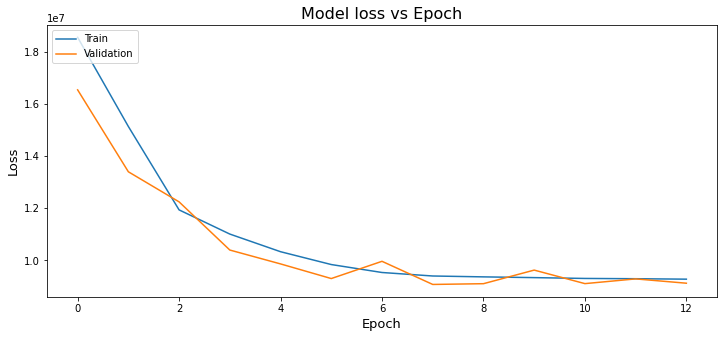

In [85]:
# summarize history for loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss vs Epoch', size=16)
plt.ylabel('Loss', size=13)
plt.xlabel('Epoch', size=13)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

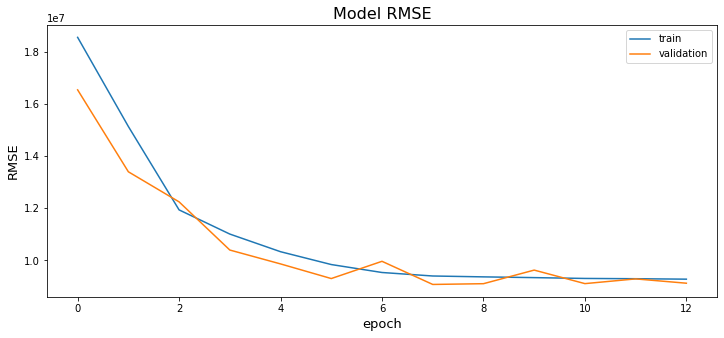

In [86]:
# summarize history for RMSE
plt.figure(figsize=(12, 5))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model RMSE', size=16)
plt.ylabel('RMSE', size=13)
plt.xlabel('epoch', size=13)
plt.legend(['train', 'validation'])
plt.show()

[Scroll Top](#Assignment-3.2)

---

## 10. Conclusion

We predicted the purchase for Black Friday using DNN model and also calculated the RMSE on validation set.

[Scroll Top](#Assignment-3.2)

---

<div class="alert alert-block alert-info">
    <b>Copyright</b> 2020 Srushti Dhamangaonkar<br>
    <br>Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
    <br>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
    <br>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    <br><br>
    
<div class="text-center">
    <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br>
</div></div>